# Application Topic: Multisource Statistically-Optimized Nearfield Acoustical Holography
Author: Jacob Ward | Email: jacob.ward@live.com

## Description
In military jet noise acoustics research, it is useful to know sound pressure levels at all points surrounding a jet, however placing a microphone at all points around a jet is expensive and impractical.  Instead, inverse array methods are used to reconstruct the sound field surrounding the jet.  One such inverse array method is multisource statistically-optimized nearfield acoustical holography, or M-SONAH for short. In this method, The input from a smaller array of microphones can be used to reconstruct the entire sound field surrounding a jet. An example of this is shown in the figure below. On the left is shown the input array of microphones.  The pressures recorded by these microphones are plugged into the M-SONAH algorithm to create the sound field reconstruction on the right. The following section will give a brief overview of the M-SONAH algorithm.

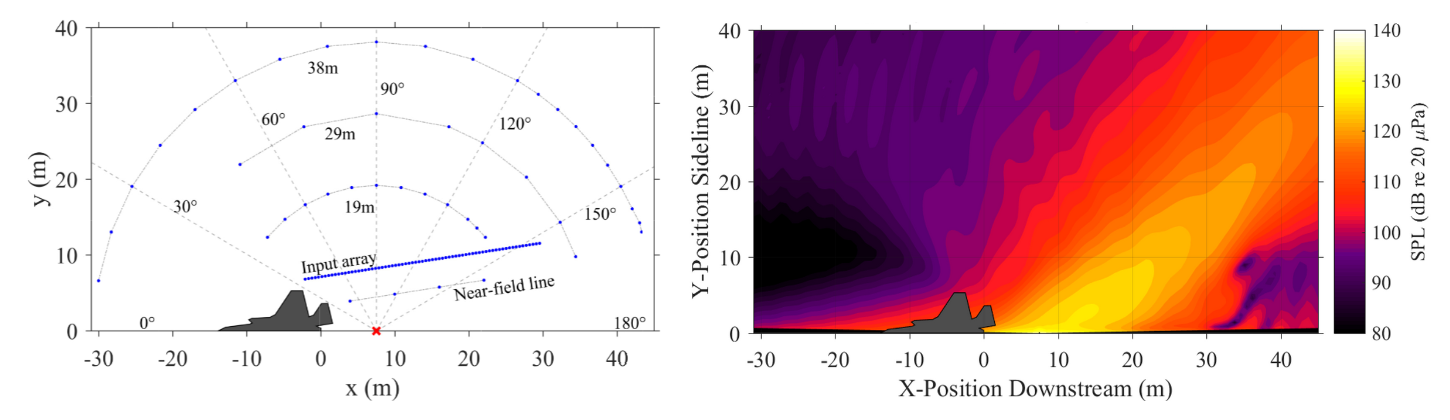

In [1]:
from PIL import Image
img = Image.open('MSONAH_EXAMPLE.png')
img

## M-SONAH Algorithm
First the sound field is measured at a set of locations $r_h, h = 1,2,...,\ I$ on the hologram $\Omega$. These locations need to be in a region that has no noise sources present. We will be reconstructing the sound pressures at locations $r_q, q = 1,2,...,\ Q$ on the surface $\Gamma.$ Next we select a set of wave functions, $\Psi_n, n = 1,2,...,\ N$, that are solutions to the Helmholtz equation in the source-free field.  The wave functions we choose depend on the source properties of the noise source we are interested in, but the most common are planar, cylindrical or spherical. Linear combinations of the basis functions, $\Psi_n$, can be used to express the pressures at $\Omega$ and $\Gamma$.

We can expand the hologram pressures on $\Omega$ as $p(r_h) = \sum_{n=1}^N g_n\Psi_n(r_h), h = 1,2,...,\ I$, which in matrix form is $Dg = p(r_h)$ where $g$ is the matrix of complex expansion coefficeints for the wave functions that we are trying to find so that we can use them to reconstruct the sound field. $D$ is the matrix of wave functions evaluated at our measurement positions. The transpose of $D$ $(A' = D^T)$ is 

<center>$A' = \begin{bmatrix} \Psi_1(r_1) & \Psi_1(r_2) & . & . & . & \Psi_1(r_I) \\ \Psi_2(r_1) & \Psi_2(r_2) & . & . & . & \Psi_2(r_I) \\ . & . & . & . & . & . \\ . & . & . & . & . & . \\ . & . & . & . & . & . \\ \Psi_N(r_1) & \Psi_N(r_2) & . & . & . & \Psi_N(r_I) \end{bmatrix}$</center>

One of the advantages of M-SONAH is the fact that it can include multiple sets of wave functions which can be combinations of planar, cylindrical and spherical functions. Thus, for each of the $I$ positions on $\Omega$, we can define a set of wave function values for each source type, $s$.  For each source, we create a matrix $B_s$ that is defined as

<center>$B_s = \begin{bmatrix} \Psi_1^s(r_1) & \Psi_1^s(r_2) & . & . & . & \Psi_1^s(r_I) \\ \Psi_2^s(r_1) & \Psi_2^s(r_2) & . & . & . & \Psi_2^s(r_I) \\ . & . & . & . & . & . \\ . & . & . & . & . & . \\ . & . & . & . & . & . \\ \Psi_N^s(r_1) & \Psi_N^s(r_2) & . & . & . & \Psi_N^s(r_I) \end{bmatrix}$</center>

and then we can concatenate the wave function matrices for all $s$ sources to get our $A$ matrix

<center>$A = \begin{bmatrix} B_1 \\ B_2 \\ . \\ . \\ . \\B_s \end{bmatrix}$</center>

where the total number of wave functions across all $s$ sets is called M. If the number of equations, $I$, is greater than the number of unknowns, $M$, then the problem is overdetermined and we use the least-squares solution to find the coefficients using the equation


<center>$g = (D^HD)^{-1}D^Hp(r_h)$</center>
<center>(Moon and Stirling, Pg. 139 Eq. 3.19)</center>

Usually in M-SONAH applications, however, I < M so the problem is underdetermined and the least-norm solution is found using the equation


<center>$g = D^H(DD^H)^{-1}p(r_h)$</center>
<center>(Moon and Stirling, Pg. 183 Eq. 3.91)</center>

The last step is a regularization process which won't be covered here, and finally the reconstructed pressures can be found by multiplying our expansion coefficients by the matrix of wave function values at all reconstruction locations. One important thing to note is that this reconstruction is only valid in source-free regions and the reconstructed pressures blow up as you approach the source location. This is why there is actually a black region in the reconstruction above close to the centerline of the jet exhaust where the noise sources are located.

# Code Example
Uploaded to this repository is a zip file called MSONAH_EXAMPLE_CODE that contains several MATLAB functions and a script that shows M-SONAH in action. In this code, first numerical sources are generated. An array of $51$ source monopoles is generated at $x = 0$, $y = 0.5$, and along the line from $z = -0.5$ to $0.5$. Then to simulate ground reflections (the ground is represented by the grey plane in the figure below), an identical image array of sources is generated at $x = 0$, $y = -0.5$, and from $z = -0.5$ to $0.5$. These source locations are shown in red in the geometry figure below. Then measurements are generated in the vertical plane at $x = 0.2$. These measurements are "taken" on a $20$ by $20$ grid for a total of $400$ measurement locations. The grid of $400$ measurement points is represented by the blue plane in the figure below.

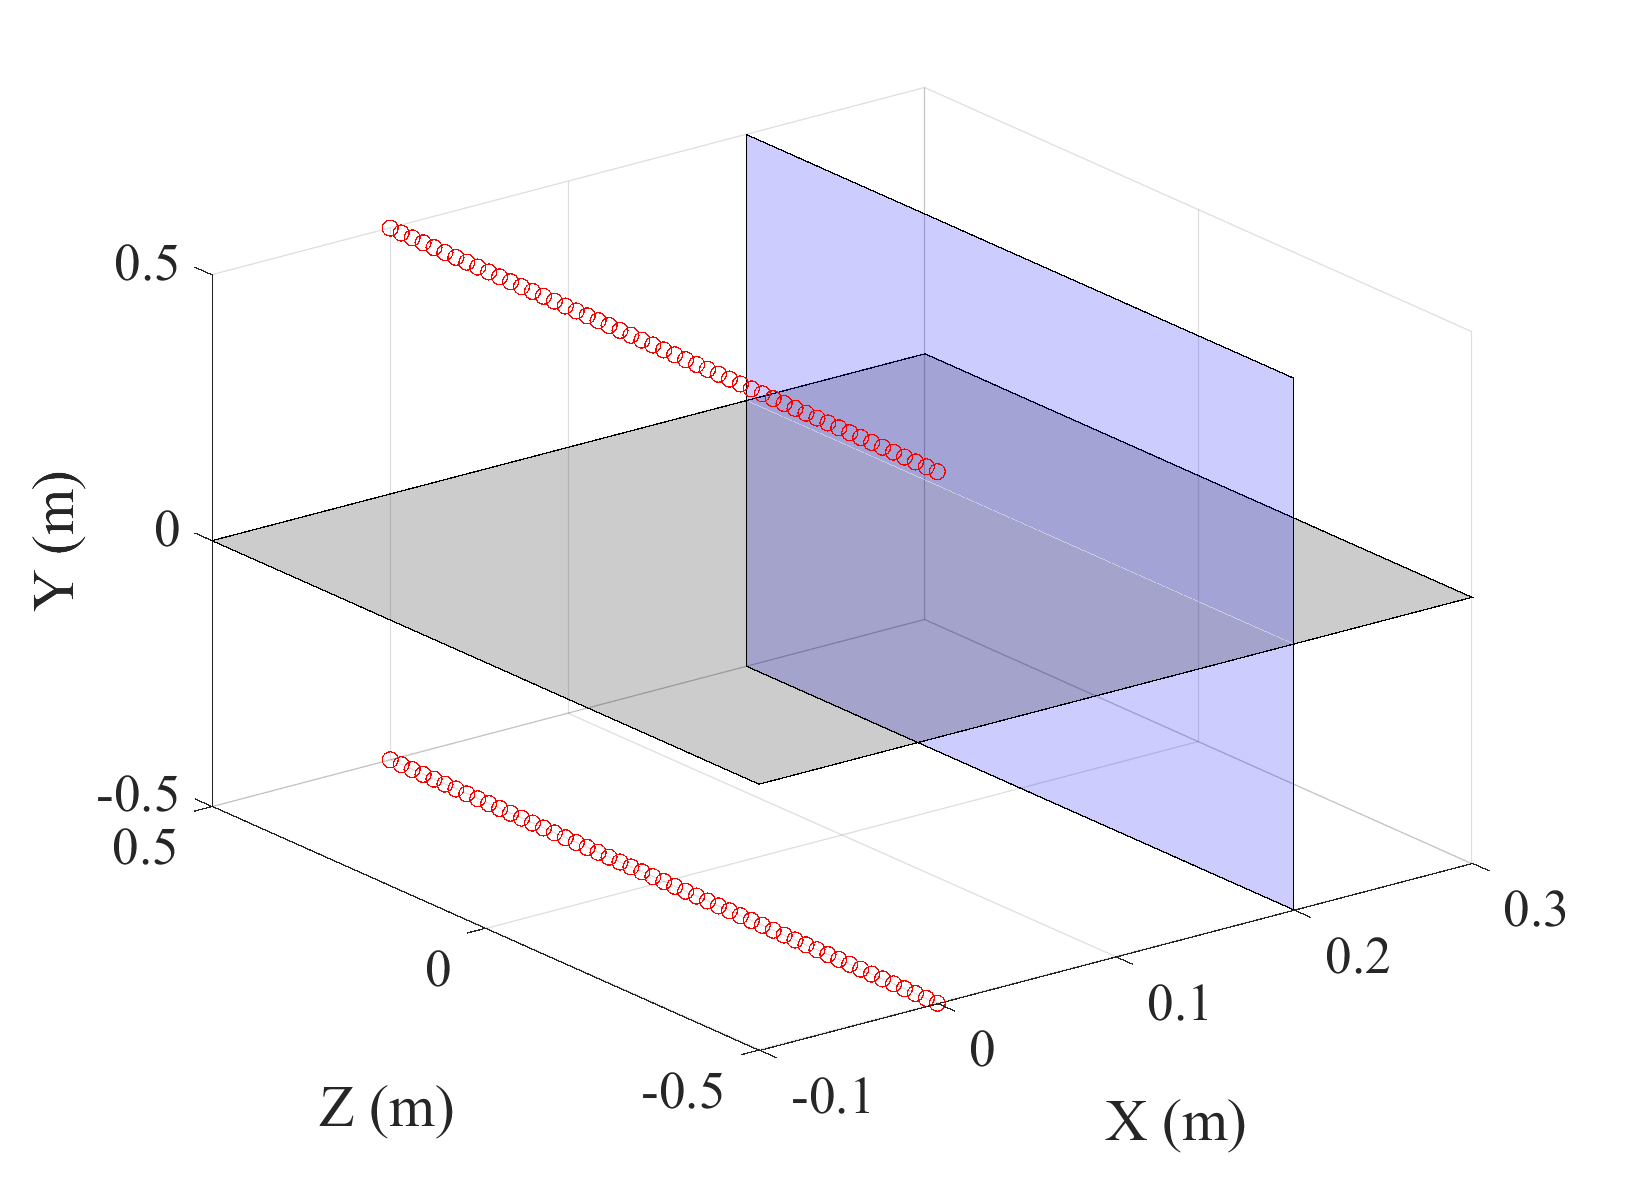

In [2]:
from PIL import Image
img = Image.open('MSONAH_EXAMPLE_CODE_GEOMETRY.png')
img

Next, these measurement values are plugged into the M-SONAH algorithm to try to reconstruct the sound pressure levels near the source in the vertical plane at $x = 0.01$ (remember that we can't do $x = 0$ and reconstruct directly on our sources because our solution is only valid in the source-free region). The measurement and "source" reconstruction are shown in the figure below.

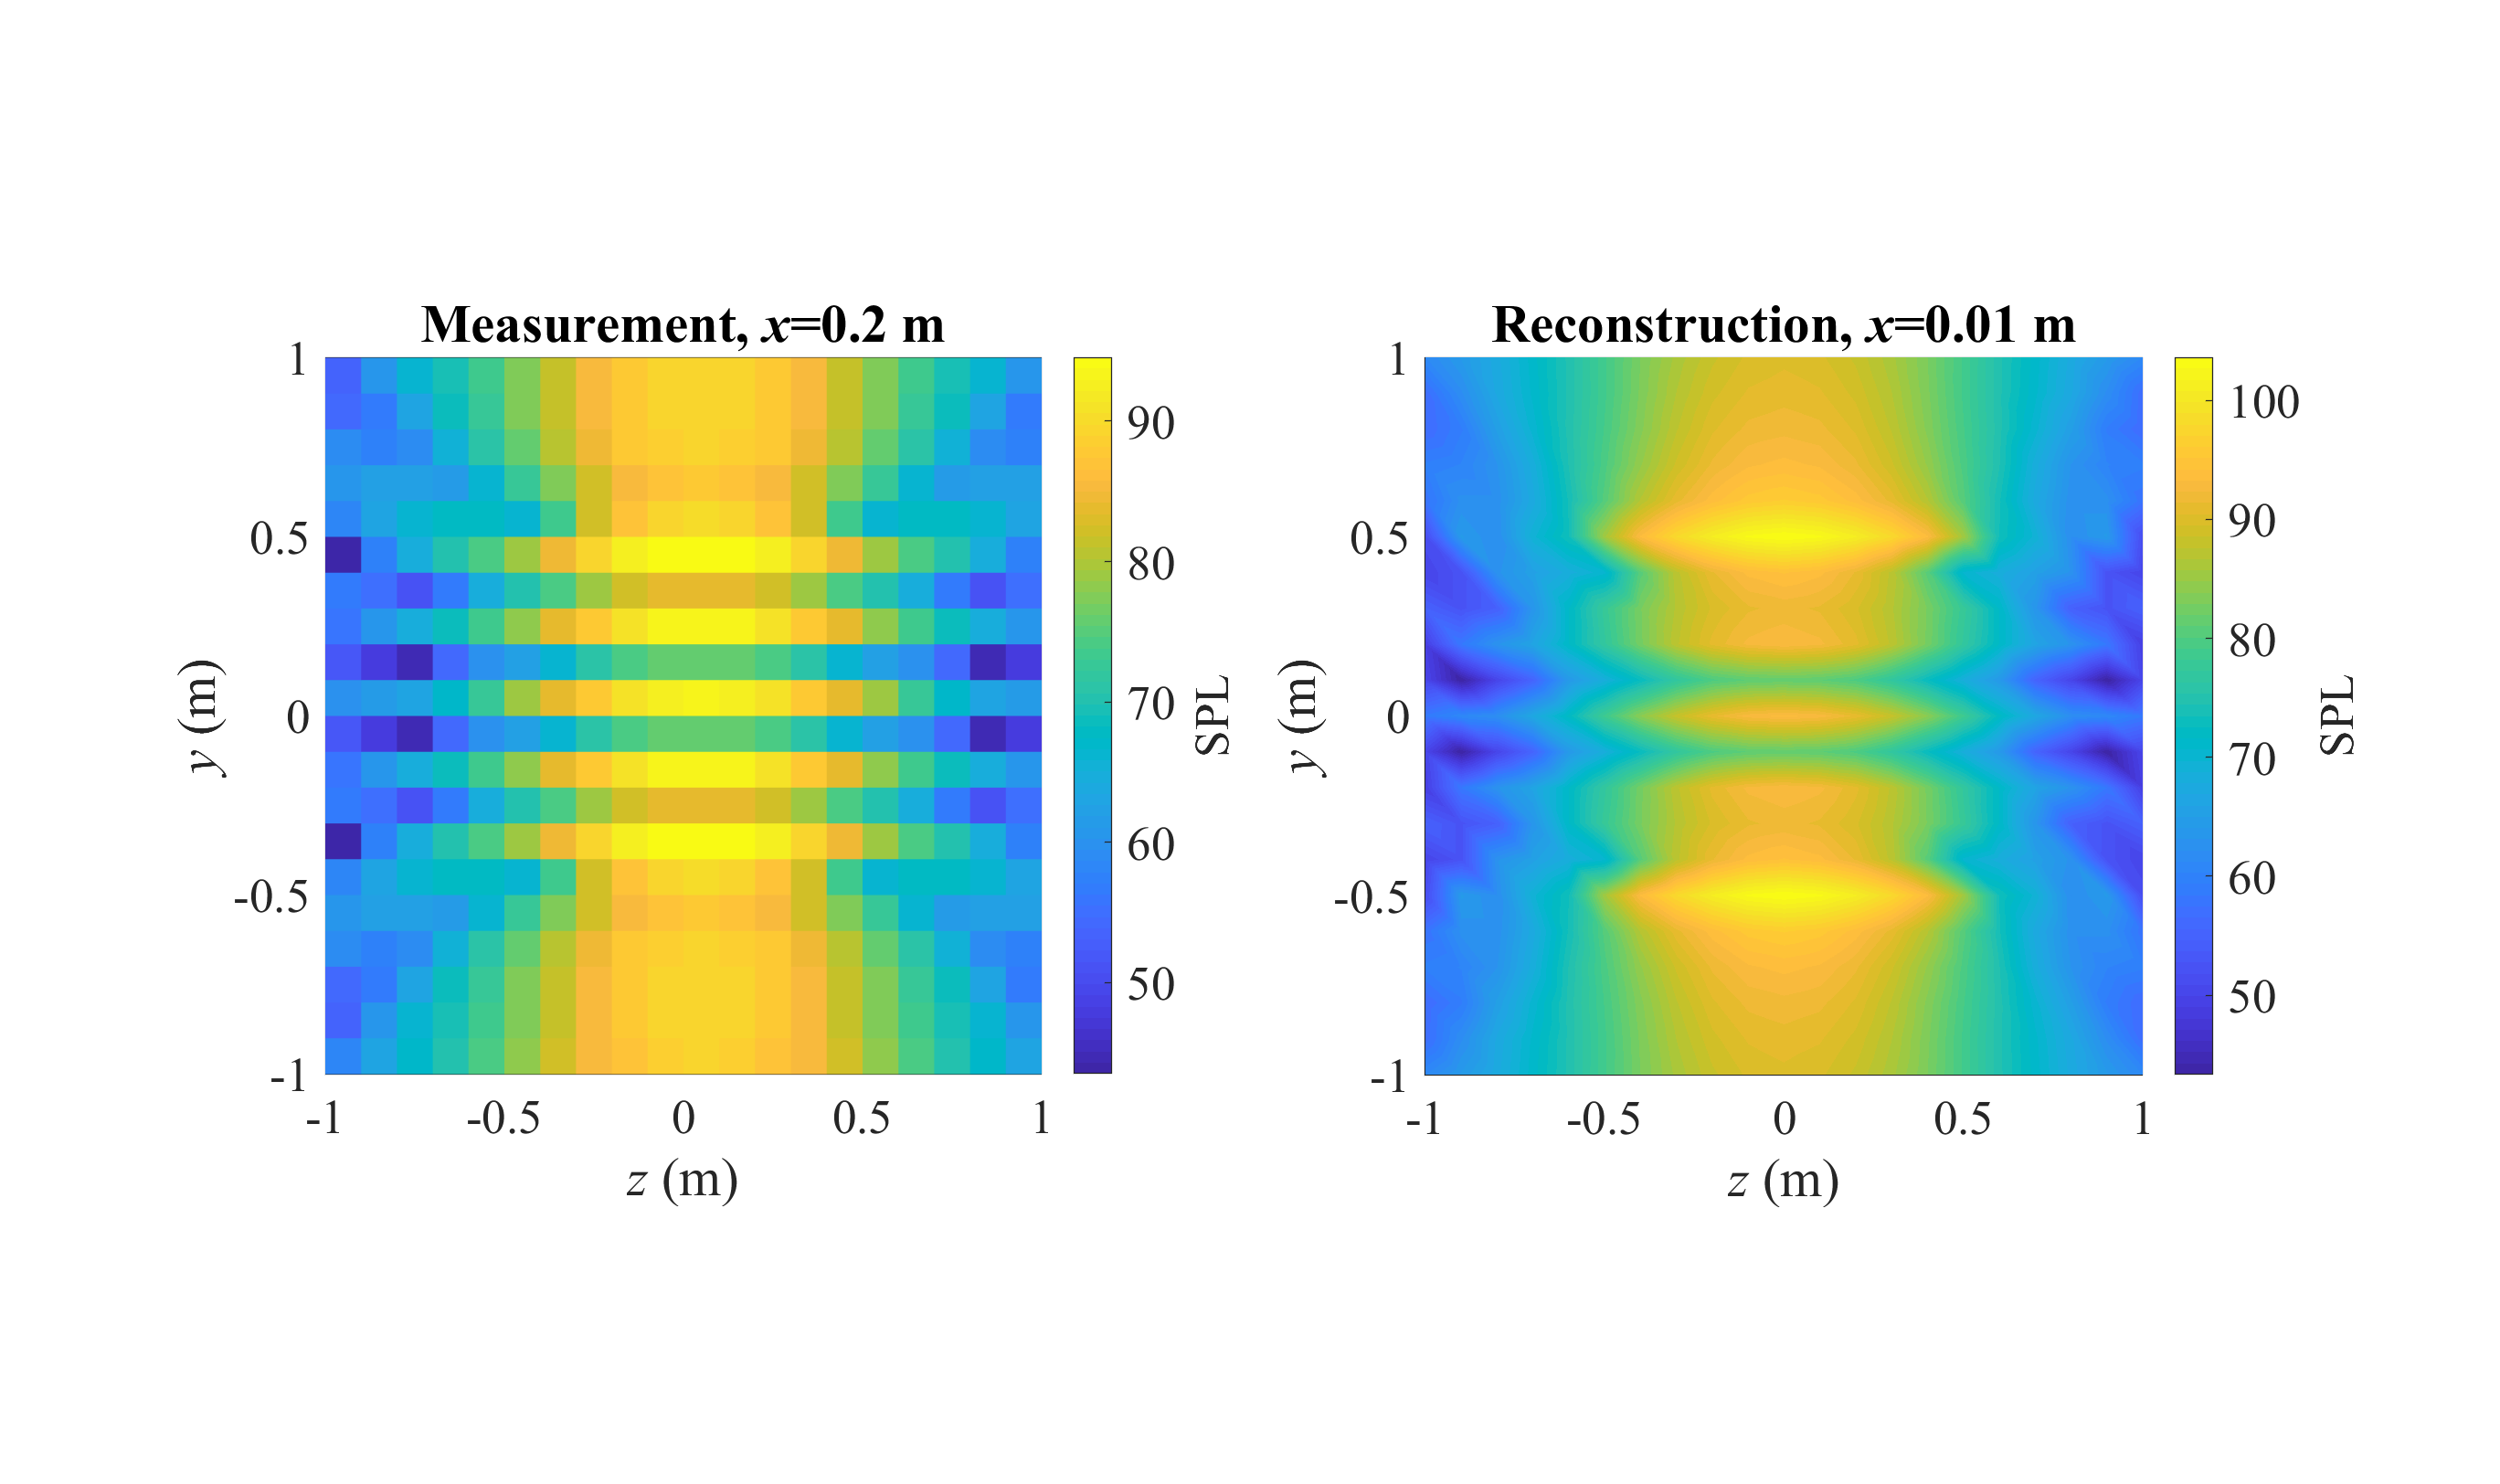

In [3]:
from PIL import Image
img = Image.open('MSONAH_EXAMPLE_CODE_MEASUREMENT_AND_RESULTS.png')
img

Looking at our measurement in the left of the figure above, we see an interference pattern and it isn't clear that our sources are along lines at $y = -0.5$ and $0.5$. However after inputting our measurement values into the M-SONAH algorithm, it is able to correctly predict strong source sound pressure levels at $y = +/-0.5$ from $z = -0.5$ to $0.5$ just as expected.